<a href="https://colab.research.google.com/github/sri-sudha14/PyTorch/blob/main/PyTorch_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step)
y = weight * X + bias

X[:10], y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260]))

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(8, 5))
  plt.scatter(train_data, train_labels, c="b", s=5, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=5, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")

  plt.legend(prop={"size": 14});

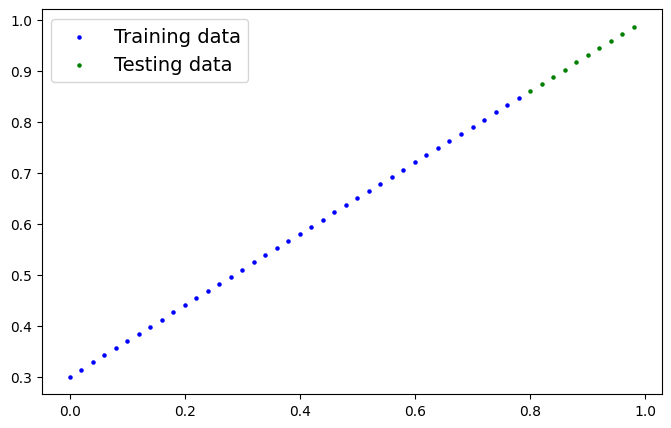

In [ ]:
plot_predictions();

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),
                                   requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),
                                requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
              return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
print(list(model_0.parameters()))
model_0.state_dict()

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])


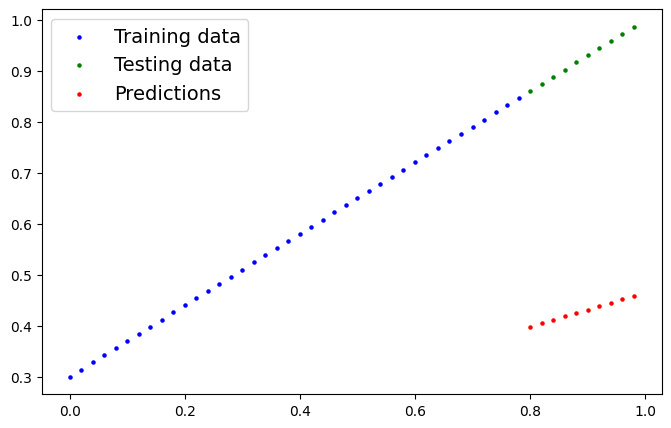

In [ ]:
with torch.inference_mode():
    y_preds = model_0(X_test)

print(y_preds)
plot_predictions(predictions=y_preds)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)
epoch = 200
train_loss_values = []
test_loss_values = []
epoch_count = []
for i in range(epoch):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))
  # print(model_0.state_dict())
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())


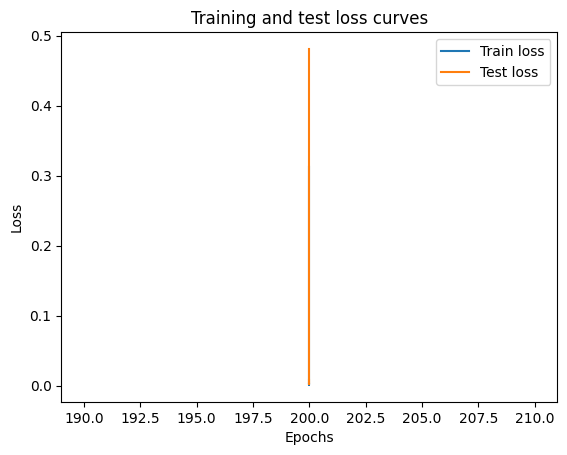

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([0.8685, 0.8825, 0.8965, 0.9105, 0.9245, 0.9384, 0.9524, 0.9664, 0.9804,
        0.9944])

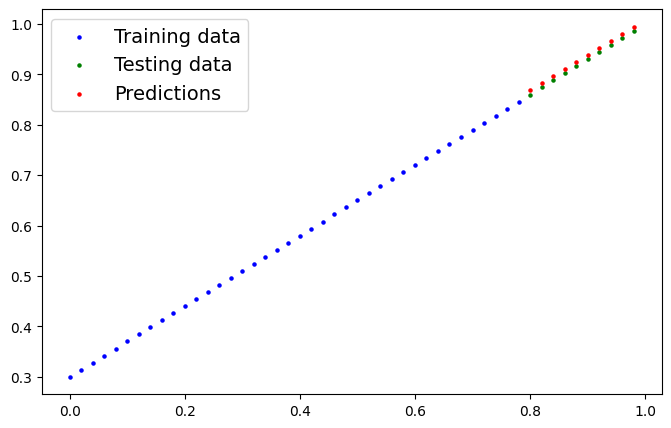

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [ ]:
loaded_model_preds

tensor([0.8685, 0.8825, 0.8965, 0.9105, 0.9245, 0.9384, 0.9524, 0.9664, 0.9804,
        0.9944])

In [ ]:
y_preds == loaded_model_preds

tensor([True, True, True, True, True, True, True, True, True, True])